In [14]:
import gym
from itertools import count
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

In [15]:
env = gym.make('CartPole-v0')

# Simple genetic algorithm

Based on the previous experiments with Q Learning, the heuristic function often worked better than actual Q Learning. Therefore I was curious, how well it could perform in a genetic setting.

In [16]:
class Actor():
    def __init__(self, m1, s1, m2, s2):
        self.a1 = np.random.normal(m1,s1)
        self.a2 = np.random.normal(m2,s2)
    def act(self, state):
        return state[2] + state[1]*self.a1 + state[2]*self.a2 > 0

100%|██████████| 1000/1000 [00:01<00:00, 669.83it/s]

Complete


<function matplotlib.pyplot.show(*args, **kw)>

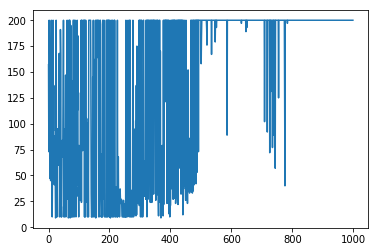

In [63]:
episode_durations = []
num_episodes = 1000
dist = (-1, 1, 1, 1)
n_actors = 10
n_top = 9
lifes = 2
results = np.zeros(n_actors)
for i_episode in trange(num_episodes):
    # Initialize the environment and state
    actors = [Actor(*dist) for _ in range(n_actors)]
    state = env.reset()
    for t in count():
        #env.render()
        # Select and perform an action
        action = actors[i_episode%n_actors].act(state)
        next_state, reward, done, _ = env.step(action.astype(np.int))

        # Store the transition in memory
        
        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the target network)
        if done:
            episode_durations.append(t + 1)
            results[i_episode % n_actors] += t+1
            break
    # Update the target network, copying all weights and biases in DQN
    if (i_episode+1) % (lifes * n_actors) == 0:
        good_actors = [actors[i] for i in range(n_actors) if results.argsort()[i] < 5]
        good_params = np.array([[actor.a1, actor.a2] for actor in good_actors])
        dist = (good_params[:,0].mean(), (good_params[:,0].std() + dist[1]) / 2, good_params[:,1].mean(), (good_params[:,1].std() + dist[3]) / 2)  
        # note in above std goes down by taking the average of the old ones
        results = np.zeros(n_actors)

    
plt.plot(episode_durations)

    

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show

In [65]:
np.array(episode_durations)[-200:].mean()

200.0

In [67]:
dist

(-0.14836966051331898,
 0.006059872866574183,
 1.4285045987692162,
 0.007275871245109342)

### Conclusions

It just works. Note it did take a dozen of restarts to finally converge. Below I've rerun the code to make sure that's it.

100%|██████████| 1000/1000 [00:02<00:00, 458.57it/s]


Complete


<function matplotlib.pyplot.show(*args, **kw)>

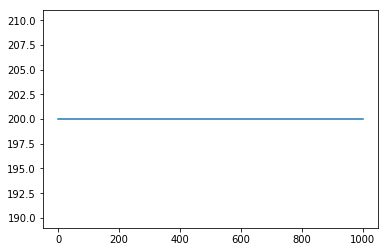

In [68]:
episode_durations = []
num_episodes = 1000
#dist = (-1, 1, 1, 1)
n_actors = 10
n_top = 9
lifes = 2
results = np.zeros(n_actors)
for i_episode in trange(num_episodes):
    # Initialize the environment and state
    actors = [Actor(*dist) for _ in range(n_actors)]
    state = env.reset()
    for t in count():
        #env.render()
        # Select and perform an action
        action = actors[i_episode%n_actors].act(state)
        next_state, reward, done, _ = env.step(action.astype(np.int))

        # Store the transition in memory
        
        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the target network)
        if done:
            episode_durations.append(t + 1)
            results[i_episode % n_actors] += t+1
            break
    # Update the target network, copying all weights and biases in DQN
    if (i_episode+1) % (lifes * n_actors) == 0:
        good_actors = [actors[i] for i in range(n_actors) if results.argsort()[i] < 5]
        good_params = np.array([[actor.a1, actor.a2] for actor in good_actors])
        dist = (good_params[:,0].mean(), (good_params[:,0].std() + dist[1]) / 2, good_params[:,1].mean(), (good_params[:,1].std() + dist[3]) / 2)  
        # note in above std goes down by taking the average of the old ones
        results = np.zeros(n_actors)

    
plt.plot(episode_durations)

    

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show